<a href="https://colab.research.google.com/github/jiuqi9797/MachineLearning/blob/main/cnnFirst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("/content/drive/MyDrive/colab/keshe/") 

In [2]:
import os
os.environ['KAGGLE_USERNAME']="wzrziran"
os.environ['KAGGLE_KEY']="b4d101737c58f383daac0253b1852499"
!kaggle competitions download -c dogs-vs-cats

 97% 527M/543M [00:04<00:00, 176MB/s]
100% 543M/543M [00:04<00:00, 130MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 12.2MB/s]
 98% 267M/271M [00:03<00:00, 100MB/s] 
100% 271M/271M [00:03<00:00, 79.6MB/s]


drive  sample_data  train


In [3]:
#对数据进行解压
from zipfile import ZipFile
#对测试的数据进行解压操作
file_train_name ="/content/drive/MyDrive/colab/keshe/train.zip" 

with ZipFile(file_train_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
data_dir_list = os.listdir('/content/drive/MyDrive/colab/keshe/train')
print("图片数量：",len(data_dir_list)) 
print(data_dir_list[1:10]) 

图片数量： 25000
['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']


In [7]:
import os
#这里打印图片的命名可以发现都是类别加编号,并且都是jpg格式
#定义好原始训练数据集的path，定义小量数据样本集的路径并且创建该路径
oringinal_dataset_dir = "/content/drive/MyDrive/colab/keshe/train"
base_dir ="/content/drive/MyDrive/colab/keshe/cats_and_dogs_small"

#创建训练集目录
train_dir =os.path.join(base_dir,'train')
#创建验证集目录
validation_dir =os.path.join(base_dir,'validation')
#创建测试集目录
test_dir =os.path.join(base_dir,'test')
#创建训练集下面cats目录
train_cats_dir =os.path.join(train_dir,'cats')
#创建训练集下面dogs目录
train_dogs_dir =os.path.join(train_dir,'dogs')
#创建测试集下面cats目录
test_cats_dir =os.path.join(test_dir,'cats')
#创建测试集下面dogs目录
test_dogs_dir =os.path.join(test_dir,'dogs')
#创建验证集下面cats目录
validation_cats_dir =os.path.join(validation_dir,'cats')
#创建验证集下面dogs目录
validation_dogs_dir =os.path.join(validation_dir,'dogs')

In [5]:

#第一次执行的时候使用
base_dir ="/content/drive/MyDrive/colab/keshe/cats_and_dogs_small"
oringinal_dataset_dir = "/content/drive/MyDrive/colab/keshe/train"
os.mkdir(base_dir)
#创建训练集目录
train_dir =os.path.join(base_dir,'train')
os.mkdir(train_dir)
#创建验证集目录
validation_dir =os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
#创建测试集目录
test_dir =os.path.join(base_dir,'test')
os.mkdir(test_dir)

#创建训练集下面cats目录
train_cats_dir =os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
#创建训练集下面dogs目录
train_dogs_dir =os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

#创建测试集下面cats目录
test_cats_dir =os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
#创建测试集下面dogs目录
test_dogs_dir =os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

#创建验证集下面cats目录
validation_cats_dir =os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
#创建验证集下面dogs目录
validation_dogs_dir =os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
import shutil
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(oringinal_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(oringinal_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(oringinal_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(oringinal_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(oringinal_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(oringinal_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

In [9]:
#对于shutle进行image的copy之后，通过打印查看里面train test 以及 validation里面的图片当中关于cat和dog图片的数量
#train当中 有1000张 validation和test各500张
print("样本当中 训练集 train--cat图片数量",len(os.listdir(train_cats_dir)))
print("样本当中训练集train--dog图片数量",len(os.listdir(train_dogs_dir)))
print("样本当中测试集test--cat图片数量",len(os.listdir(test_cats_dir)))
print("样本当中测试集test--dog图片数量",len(os.listdir(test_dogs_dir)))
print("样本当中验证集validation--cat图片数量",len(os.listdir(validation_cats_dir)))
print("样本当中验证集validation--dog图片数量",len(os.listdir(validation_dogs_dir)))

样本当中 训练集 train--cat图片数量 1000
样本当中训练集train--dog图片数量 1000
样本当中测试集test--cat图片数量 500
样本当中测试集test--dog图片数量 500
样本当中验证集validation--cat图片数量 500
样本当中验证集validation--dog图片数量 500


In [10]:
#第一次定义的模型
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_gennerator = train_data_gen.flow_from_directory(train_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')
validation_gennerator = test_data_gen.flow_from_directory(validation_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')

from keras import optimizers 
 
#aa
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(train_gennerator,
                steps_per_epoch=100,
                epochs=30,
                validation_data=validation_gennerator,
                validation_steps=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 53s 92ms/step - loss: 0.6970 - acc: 0.5410 - val_loss: 0.7711 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6673 - acc: 0.5970 - val_loss: 0.6567 - val_acc: 0.6550
Epoch 3/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6244 - acc: 0.6418 - val_loss: 0.6143 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5821 - acc: 0.6972 - val_loss: 0.5665 - val_acc: 0.7250
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5487 - acc: 0.7156 - val_loss: 0.6592 - val_acc: 0.5950
Epoch 6/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5223 - acc: 0.7331 - val_loss: 0.5587 - val_acc: 0.7300
Epoch 7/30
100/100 [==============================] - 9s 88ms/step - loss: 0.4604 - acc: 0.7751 - val_loss: 0.5806 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 9s 89ms/step -

In [ ]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

accuracy = history.history['acc']
validation_acuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, acc, 'bo', label='训练的准确度')
plt.plot(epochs, val_acc, 'b', label='验证集的准确度')
plt.title('训练集和验证集的准确度对比图')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='训练的损失函数值')
plt.plot(epochs, val_loss, 'b', label='验证集的损失函数')
plt.title('训练与验证的损失函数对比图')
plt.legend()


In [13]:
#第二次训练
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_gennerator = train_data_gen.flow_from_directory(train_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')
validation_gennerator = test_data_gen.flow_from_directory(validation_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')

from keras import optimizers 
 
#aa
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(train_gennerator,
                steps_per_epoch=100,
                epochs=30,
                validation_data=validation_gennerator,
                validation_steps=10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 11s 95ms/step - loss: 0.7110 - acc: 0.5057 - val_loss: 0.6839 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6810 - acc: 0.5715 - val_loss: 0.7016 - val_acc: 0.5350
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6558 - acc: 0.6059 - val_loss: 0.6423 - val_acc: 0.6050
Epoch 4/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6266 - acc: 0.6377 - val_loss: 0.6443 - val_acc: 0.6400
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5942 - acc: 0.6775 - val_loss: 0.6060 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5419 - acc: 0.7217 - val_loss: 0.5272 - val_acc: 0.7250
Epoch 7/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5262 - acc: 0.7280 - val_loss: 0.5304 - val_acc: 0.7400
Epoch 8/30
100/100 [==============================] - 9s 92ms/step -

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_

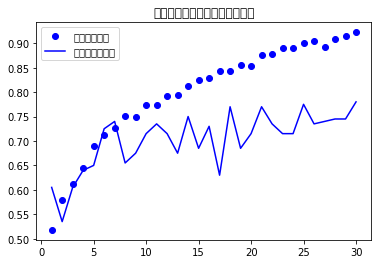

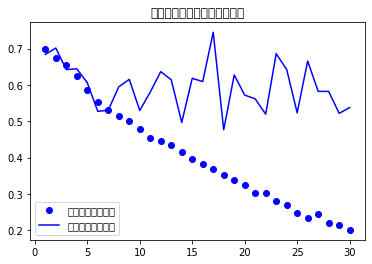

In [15]:
model.save('cats_and_dogs_small_2.h5')

import matplotlib.pyplot as plt

accuracy = history.history['acc']
validation_acuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='训练的准确度')
plt.plot(epochs, validation_acuracy, 'b', label='验证集的准确度')
plt.title('训练集和验证集的准确度对比图')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='训练的损失函数值')
plt.plot(epochs, validation_loss, 'b', label='验证集的损失函数')
plt.title('训练与验证的损失函数对比图')
plt.legend()


In [18]:
#第三次训练,在发现进行fropoout随机断开
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_gennerator = train_data_gen.flow_from_directory(train_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')
validation_gennerator = test_data_gen.flow_from_directory(validation_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')

from keras import optimizers 
 
#aa
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(),
              metrics=['acc'])
history = model.fit_generator(train_gennerator,
                steps_per_epoch=100,
                epochs=30,
                validation_data=validation_gennerator,
                validation_steps=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 19s 181ms/step - loss: 0.7050 - acc: 0.4901 - val_loss: 0.6930 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6932 - acc: 0.5185 - val_loss: 0.6974 - val_acc: 0.4800
Epoch 3/30
100/100 [==============================] - 18s 176ms/step - loss: 0.6936 - acc: 0.4941 - val_loss: 0.6933 - val_acc: 0.5050
Epoch 4/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6937 - acc: 0.5190 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6932 - acc: 0.4638 - val_loss: 0.6913 - val_acc: 0.4950
Epoch 6/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6941 - acc: 0.5298 - val_loss: 0.6971 - val_acc: 0.3850
Epoch 7/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6923 - acc: 0.5313 - val_loss: 0.7732 - val_acc: 0.4650
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
import 